In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Worklab/MF_Model/Modules')

import mf_if_models as mf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
vec_tau_E = np.array([2, 5, 10, 20, 50, 100])
vec_tau_label = ["2", "5", "10", "20", "50", "100"]
vec_nu_i = np.linspace(0.0001, 0.1, 100)

df_nu = pd.DataFrame({vec_tau_E[0]:np.zeros_like(vec_nu_i),
					vec_tau_E[1]:np.zeros_like(vec_nu_i),
					vec_tau_E[2]:np.zeros_like(vec_nu_i),
					vec_tau_E[3]:np.zeros_like(vec_nu_i),
					vec_tau_E[4]:np.zeros_like(vec_nu_i),
					vec_tau_E[5]:np.zeros_like(vec_nu_i)})




In [3]:
n = 30000

for tau_E in vec_tau_E:
    print(tau_E, end='\t')
    for i, nu_i in enumerate(vec_nu_i):
        print(i, end=' ')
        model = mf.MCoBaIF(w_E = 0.1,
						w_I = 0.4,
						tau_E = tau_E,
						tau_I = 10,
						nu_i = nu_i)
        E_I = model.E_I
        V_th = model.V_th

        vec_Vk = np.linspace(E_I, V_th, n + 1)

        df_nu[tau_E][i] = model.calculate_firing_rate(vec_Vk)
    
    print()

2	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
5	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
20	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 4

In [4]:
fRate_data_path = "../../Data/fRate_data/"

df_nu_sim = pd.read_csv(f"{fRate_data_path}firing_rate_iRate_tauFixed.dat", index_col=0)


In [5]:
df_error = pd.DataFrame({vec_tau_E[0]:np.zeros_like(vec_nu_i),
						vec_tau_E[1]:np.zeros_like(vec_nu_i),
						vec_tau_E[2]:np.zeros_like(vec_nu_i),
						vec_tau_E[3]:np.zeros_like(vec_nu_i),
						vec_tau_E[4]:np.zeros_like(vec_nu_i),
						vec_tau_E[5]:np.zeros_like(vec_nu_i)})

for tau_E, tau_E_label in zip(vec_tau_E, vec_tau_label):
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[tau_E_label], df_nu[tau_E])):
		df_error[tau_E][i] = np.abs(nu_sim - nu_analyt * 1000)


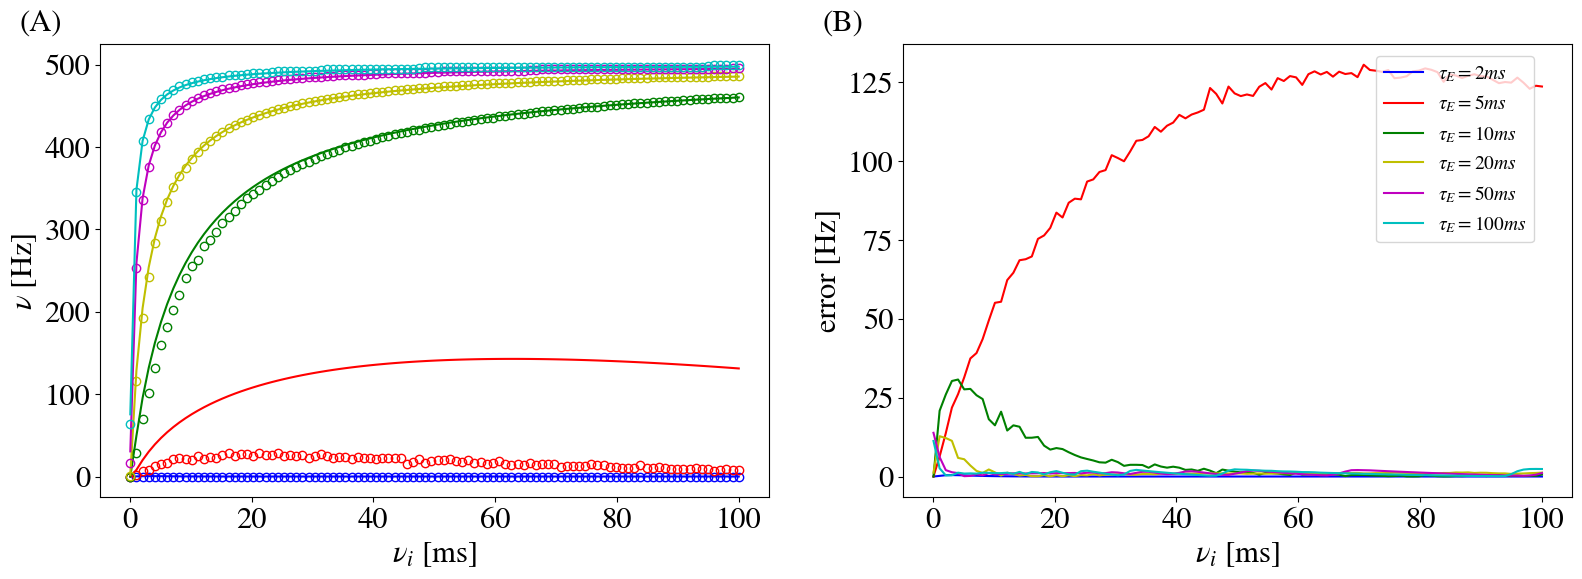

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\nu_i$ [ms]')
axs[0][1].set_xlabel(r'$\nu_i$ [ms]')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[0]]*1000, 'b-', label=r'$\tau_E = 2ms$')
axs[0][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[1]]*1000, 'r-', label=r'$\tau_E = 5ms$')
axs[0][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[2]]*1000, 'g-', label=r'$\tau_E = 10ms$')
axs[0][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[2]], 'go', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[3]]*1000, 'y-', label=r'$\tau_E = 20ms$')
axs[0][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[3]], 'yo', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[4]]*1000, 'm-', label=r'$\tau_E = 50ms$')
axs[0][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[4]], 'mo', markerfacecolor='none')
axs[0][0].plot(vec_nu_i*1000, df_nu[vec_tau_E[5]]*1000, 'c-', label=r'$\tau_E = 100ms$')
axs[0][0].plot(vec_nu_i*1000, df_nu_sim[vec_tau_label[5]], 'co', markerfacecolor='none')

axs[0][1].plot(vec_nu_i*1000, df_error[vec_tau_E[0]], 'b-')
axs[0][1].plot(vec_nu_i*1000, df_error[vec_tau_E[1]], 'r-')
axs[0][1].plot(vec_nu_i*1000, df_error[vec_tau_E[2]], 'g-')
axs[0][1].plot(vec_nu_i*1000, df_error[vec_tau_E[3]], 'y-')
axs[0][1].plot(vec_nu_i*1000, df_error[vec_tau_E[4]], 'm-')
axs[0][1].plot(vec_nu_i*1000, df_error[vec_tau_E[5]], 'c-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

4.191681171789795e-81

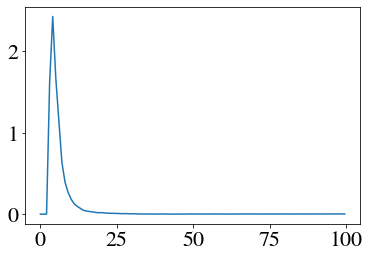

In [12]:

plt.plot(vec_tauA[::2],l)

(df_firing_rate['5'][0] - df_analytic_fRate['5'][0]*1000)**2/(df_analytic_fRate['5'][0]*1000)